# Loading The Packages

In [2]:
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
import pickle
import string
from collections import Counter, defaultdict
import operator

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim import corpora


[nltk_data] Downloading package punkt to /Users/ljyjiayi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ljyjiayi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ljyjiayi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the Data

In [2]:
product_info = pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\product_info.csv")

In [3]:
df1=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_0-250.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_16172\2585637512.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_0-250.csv")


In [4]:
df2=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_1250-end.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_16172\573283978.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_1250-end.csv")


In [5]:
df3=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_250-500.csv")

In [6]:
df4=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_500-750.csv")

In [7]:
df5=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_750-1250.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_16172\2464030112.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df5=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_750-1250.csv")


In [3]:
product_info = pd.read_csv("data/product_info.csv")
df1=pd.read_csv("data/reviews_0-250.csv")
df2=pd.read_csv("data/reviews_1250-end.csv")
df3=pd.read_csv("data/reviews_250-500.csv")
df4=pd.read_csv("data/reviews_500-750.csv")
df5=pd.read_csv("data/reviews_750-1250.csv")


/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_68087/41863996.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("data/reviews_0-250.csv")
/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_68087/41863996.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("data/reviews_1250-end.csv")
/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_68087/41863996.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df5=pd.read_csv("data/reviews_750-1250.csv")


In [8]:
df1.shape

(602130, 19)

In [9]:
df2.shape

(49977, 19)

In [10]:
df3.shape

(206725, 19)

In [11]:
df4.shape

(116262, 19)

In [12]:
df5.shape

(119317, 19)

In [13]:
###Concatenating the mutiple dataset for reviews

In [4]:
reviews_df = pd.concat([df1, df2,df3,df4,df5], axis=0, ignore_index=True)

In [15]:
reviews_df.shape

(1094411, 19)

In [16]:
reviews_df.head(3)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
reviews_df = reviews_df.drop('Unnamed: 0', axis=1)

In [18]:
reviews_df.head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [19]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [6]:
reviews_df['submission_time'] = pd.to_datetime(reviews_df['submission_time'])

# Find the oldest and newest date
oldest_date = reviews_df['submission_time'].min()
newest_date = reviews_df['submission_time'].max()

print(f"The oldest date is: {oldest_date}")
print(f"The newest date is: {newest_date}")


The oldest date is: 2008-08-28 00:00:00
The newest date is: 2023-03-21 00:00:00


In [7]:
result_df = pd.merge(reviews_df, product_info[['product_id','primary_category', 'secondary_category', 'tertiary_category']], on='product_id', how='left')

In [8]:
result_df.shape

(1094411, 21)

In [9]:
unique_products = result_df['product_id'].unique()

print(unique_products)
len(unique_products)

['P504322' 'P420652' 'P7880' ... 'P502745' 'P474936' 'P500101']


2351

##### only for the year 2022

In [10]:
latest_review = result_df[(result_df['submission_time'] >= '2022-01-01') & (result_df['submission_time'] <= '2022-12-31')]

In [11]:
latest_review.shape

(192227, 21)

In [12]:
latest_review.head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category
450,1796832802,3,0.0,0.714286,7,2,5,2022-12-31,I decided to try this as I had never used a li...,"Decent, but cheaper products do the trick",...,brown,combination,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN
451,10255886039,2,0.0,0.500000,2,1,1,2022-12-31,Might as well be putting on Vaseline because I...,Where’s the smell??,...,brown,normal,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN
452,5049431408,5,1.0,1.000000,4,0,4,2022-12-31,Love this lip mask nothing else will do Aquaph...,Must buy!,...,blue,combination,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN


In [13]:
unique_products_one = latest_review['product_id'].unique()

print(unique_products_one)
len(unique_products_one)

['P420652' 'P7880' 'P218700' ... 'P502745' 'P474936' 'P500101']


2076

##### Data Cleaning

Next we need to preprocess the text:

clean it up by getting rid of extraneous characters, punctuation, words with possible misprints, and 'stopwords' which do not add much meaning to a sentence

normalize the text using the lemmatization technique that switches any kind of a word to its base root mode. 

For example, lemmatizing the word 'Caring' would return 'Care'

Below We have written a function that cleans and lemmatizes each review:

In [14]:
def clean_text(text: str) -> str:
    """Cleans input text, tokenizes, removes stop words, and lemmatizes it"""

   
    text = re.sub(r'\d+|[^\w\s]|\b(\w+)(\s+\1)+\b', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()


    stop_words = set(stopwords.words('english'))
    tokens = (WordNetLemmatizer().lemmatize(w) 
              for w in word_tokenize(text) 
              if w not in stop_words and len(w) > 2)
 
    text = ' '.join(tokens)

    return text


latest_review['lemma_text'] = latest_review['review_text'].apply(clean_text)

# Create a column with a set of tokenized review words
latest_review['NLTK_text'] = latest_review['lemma_text'].apply(lambda x: nltk.Text(nltk.word_tokenize(x)))

/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_68087/4190908023.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_review['lemma_text'] = latest_review['review_text'].apply(clean_text)
/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_68087/4190908023.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_review['NLTK_text'] = latest_review['lemma_text'].apply(lambda x: nltk.Text(nltk.word_tokenize(x)))


In [15]:
print('Original reviews:')
for review in latest_review['review_text'].head():
    print(review)

print('\nLemmatized reviews:')
for review in latest_review['lemma_text'].head():
    print(review)

Original reviews:
I decided to try this as I had never used a lip mask at night. I find that it smells nice, pretty easy to apply, and does moisturize. However, I find that the products I was using before (drugstore lip rescue, lip scrubs, etc) have nearly the same effect at a fraction of the cost.
Might as well be putting on Vaseline because I can barely smell this! The berry shade has a strong berry smell, but this just smells like Vaseline to me. Maybe I got a bad batch but there’s barely a vanilla smell at all. It is moisturizing but so is Vaseline.
Love this lip mask nothing else will do Aquaphor and Vaseline just aren’t as moisturizing as this mask is I recommend it to everyone I know￼
I really enjoy this product! Amazing smell and the perfect consistency. It is a little weird at first to get used to the feeling on your lips when you wake up (because some of the dead skin becomes more evident) but it does a great job of moisturizing.
The best. I have nothing else to really say ot

#### Rating preprocessing

###### For machine learning, it is better to use simplified approaches to classifying ratings, and divide them into positive/negative or positive/neutral/negative.

##### Let's simplify the 5-point scale ratings and use some heuristics about how the rating represents sentiment:

rating > 3 is positive
rating = 3 is neutral
rating < 3 is negative
Let's create a new 'true_sentiment' column:

In [16]:
# Create a column with the verbal equivalent of a rating
latest_review['true_sentiment'] = latest_review['rating'].map({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})

# Show dataframe with new sentiment column
latest_review.head(3)

/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_68087/2269486841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_review['true_sentiment'] = latest_review['rating'].map({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,product_id,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category,lemma_text,NLTK_text,true_sentiment
450,1796832802,3,0.0,0.714286,7,2,5,2022-12-31,I decided to try this as I had never used a li...,"Decent, but cheaper products do the trick",...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,decided try never used lip mask night find sme...,"(decided, try, never, used, lip, mask, night, ...",neutral
451,10255886039,2,0.0,0.500000,2,1,1,2022-12-31,Might as well be putting on Vaseline because I...,Where’s the smell??,...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,might well putting vaseline barely smell berry...,"(might, well, putting, vaseline, barely, smell...",negative
452,5049431408,5,1.0,1.000000,4,0,4,2022-12-31,Love this lip mask nothing else will do Aquaph...,Must buy!,...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,love lip mask nothing else aquaphor vaseline a...,"(love, lip, mask, nothing, else, aquaphor, vas...",positive


##### Review text 

In [17]:
latest_review['length'] = latest_review['lemma_text'].apply(len)
latest_review['length'].describe().round(1)

/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_68087/2033267688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_review['length'] = latest_review['lemma_text'].apply(len)


count    192227.0
mean        194.5
std         131.5
min           4.0
25%         117.0
50%         162.0
75%         235.0
max        1497.0
Name: length, dtype: float64

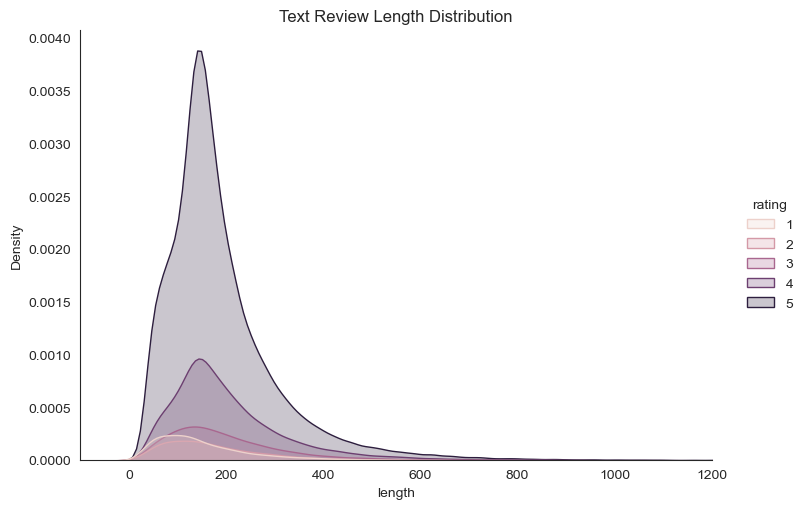

In [32]:
sns.set_style('white')
(sns.displot(data=latest_review, x='length', hue='rating', kind='kde', fill=True, aspect=1.5)
    .set(xlim=(-100, 1200), title='Text Review Length Distribution'));

In [18]:
# Compare mean review length across ratings
grouped = latest_review.groupby('rating')['length'].agg(mean_length='mean', count='count').reset_index().round(1)
grouped

,rating,mean_length,count
0,1,161.5,9067
1,2,189.4,8231
2,3,207.6,14588
3,4,208.5,37039
4,5,191.4,123302


##### Rating distribution

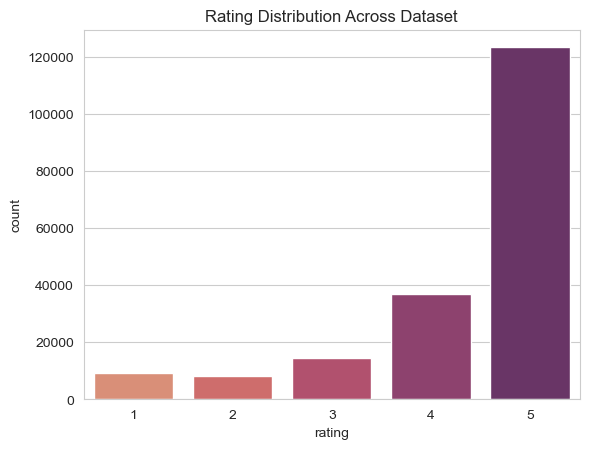

In [34]:
sns.set_style('whitegrid')
sns.countplot(data=latest_review, x='rating', palette='flare').set_title('Rating Distribution Across Dataset')
plt.show()

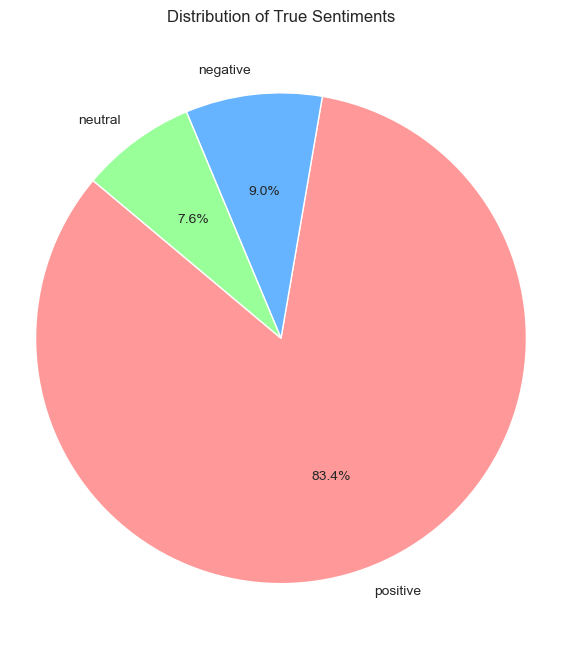

In [35]:
sentiment_counts = latest_review['true_sentiment'].value_counts()

# Define custom colors
colors = ['#ff9999','#66b3ff','#99ff99']

# Create a pie chart
plt.figure(figsize=(7, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of True Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Most common words (unigrams)

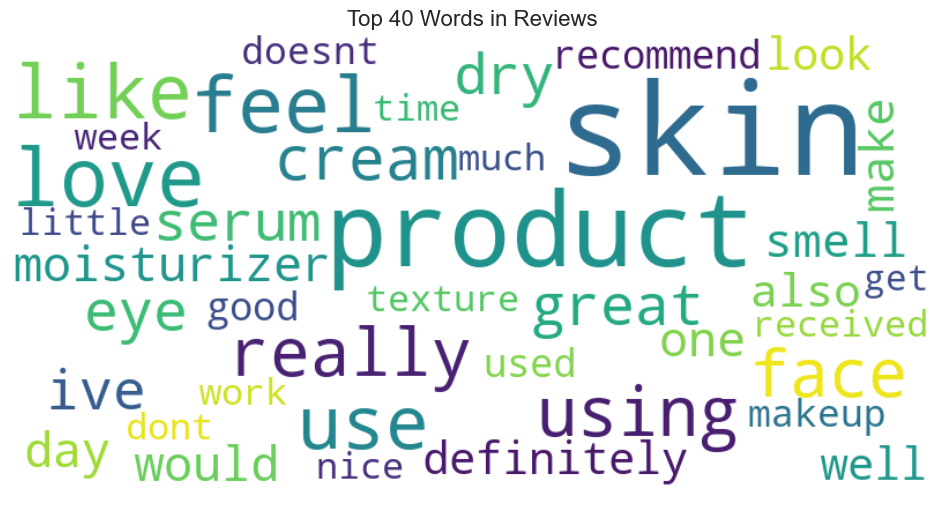

In [36]:
top_words = Counter(' '.join(latest_review['lemma_text']).split()).most_common(40)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud with a title
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Reviews', fontsize=16)
plt.show()


## Bigrams

##### Before, I was looking at one word at a time (unigrams), but now I'm moving on to looking at pairs of words (bigrams). Bigrams give more context and therefore are more informative than single words.

Let's find combinations of the most frequent pairs of words using previously created column 'NLTK_text' with word sequence:

In [37]:
# Create list of sorted bigrams
bigrams = Counter()
for phrase in latest_review['NLTK_text']:
    bigrams.update(nltk.bigrams(phrase))
    
bigrams_sorted = sorted(bigrams.items(), key=operator.itemgetter(1), reverse=True)
     

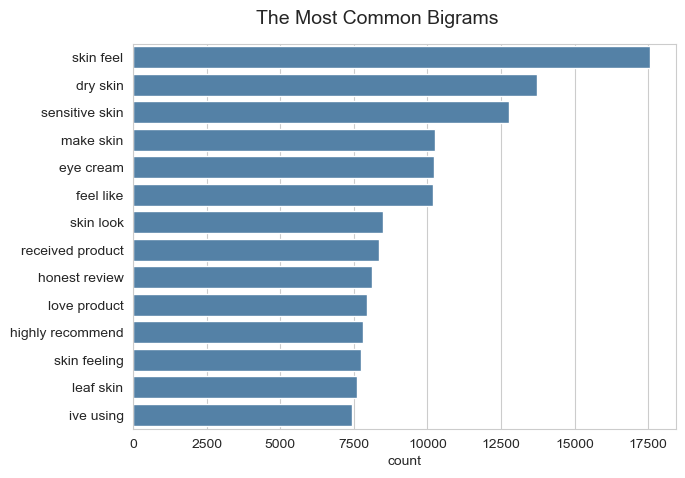

In [38]:
# Visualize bigrams frequency
bigrams_df = pd.DataFrame(bigrams_sorted[:14], columns=['bigram', 'count'])

plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.barplot(x='count', y=[' '.join(bigram) for bigram in bigrams_df['bigram']], data=bigrams_df, color='steelblue')

plt.xlabel('count')
plt.title('The Most Common Bigrams', fontsize=14, y=1.03, x=0.45);
plt.show()

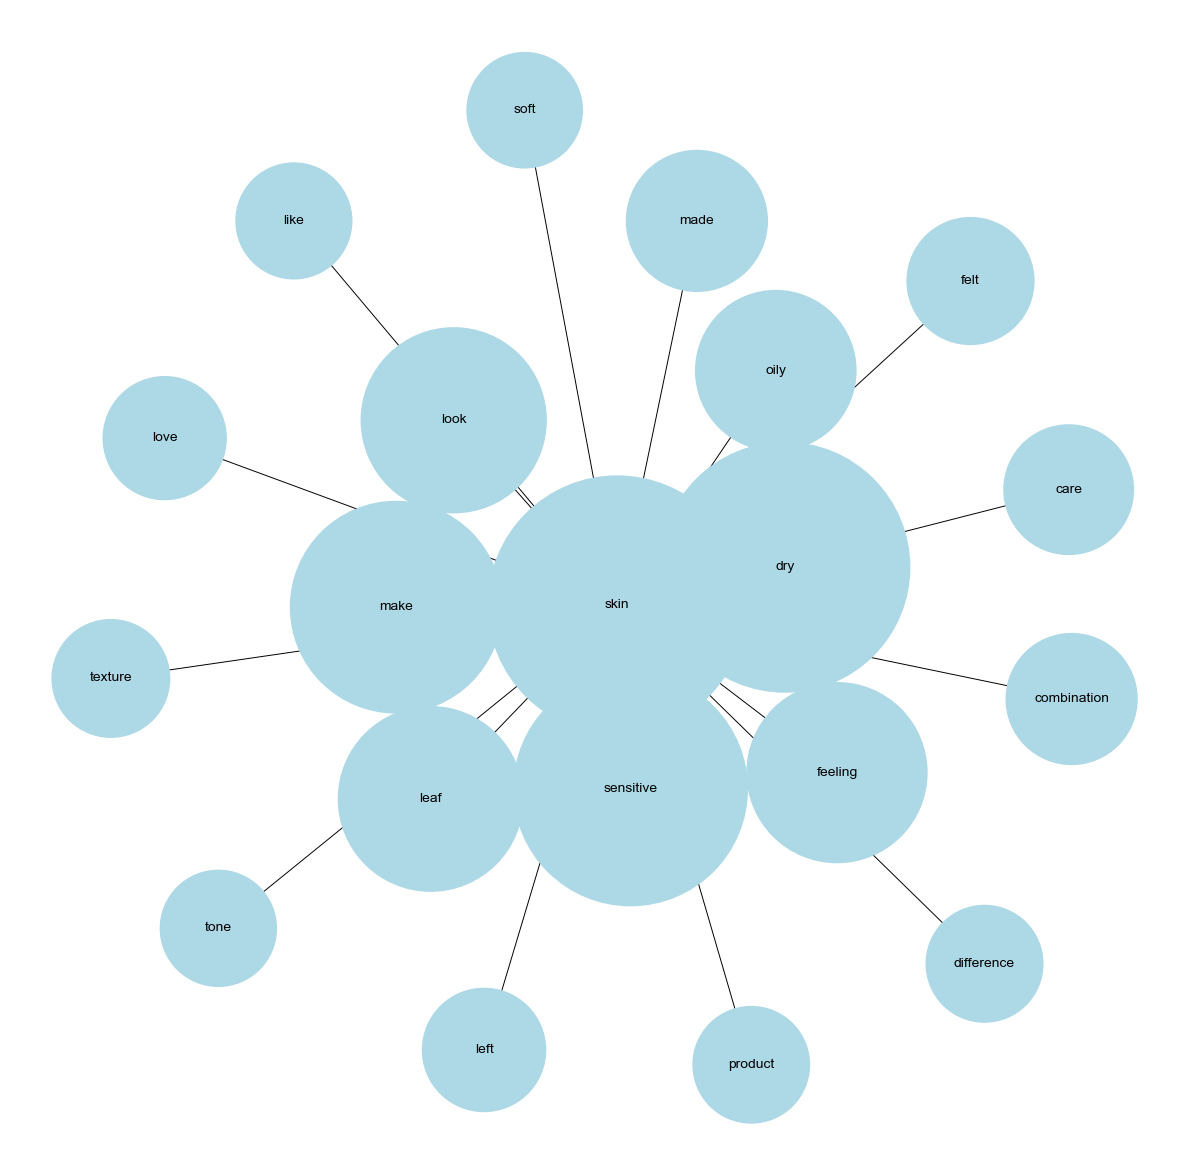

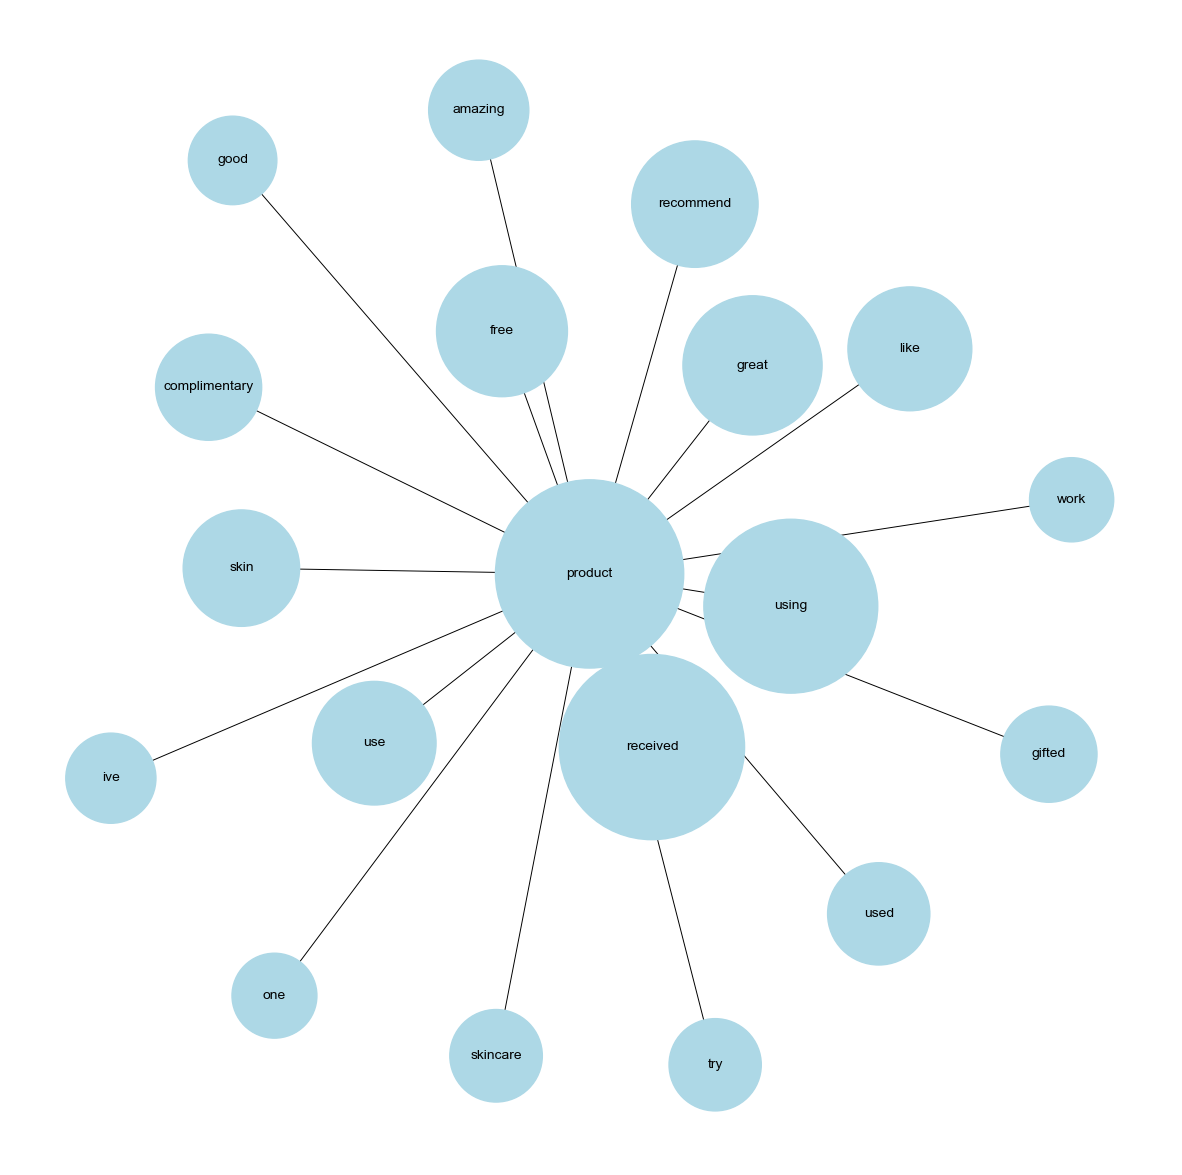

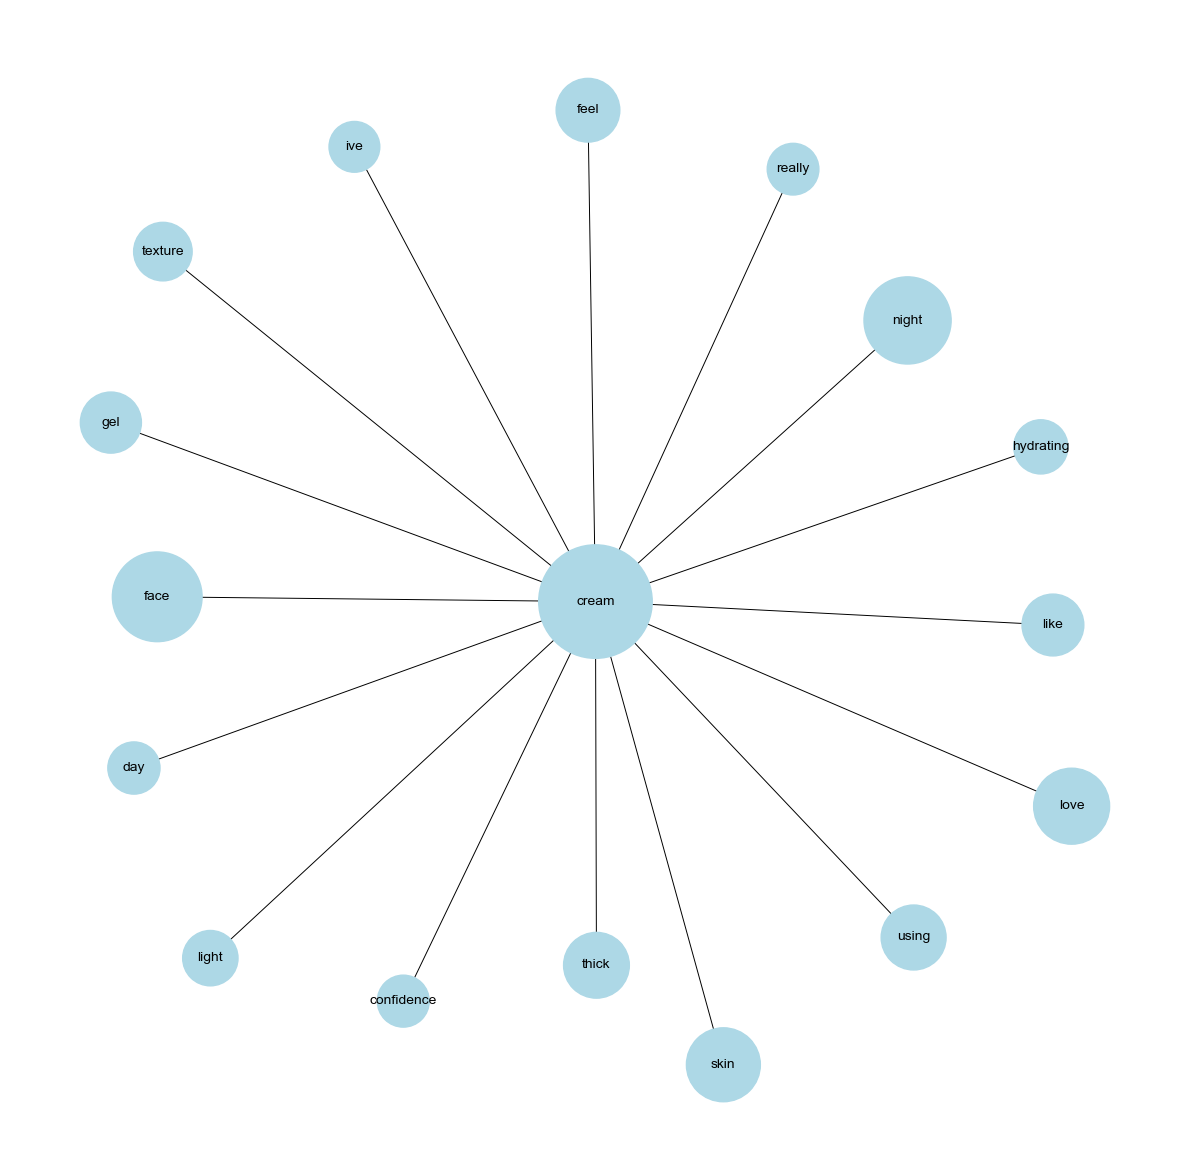

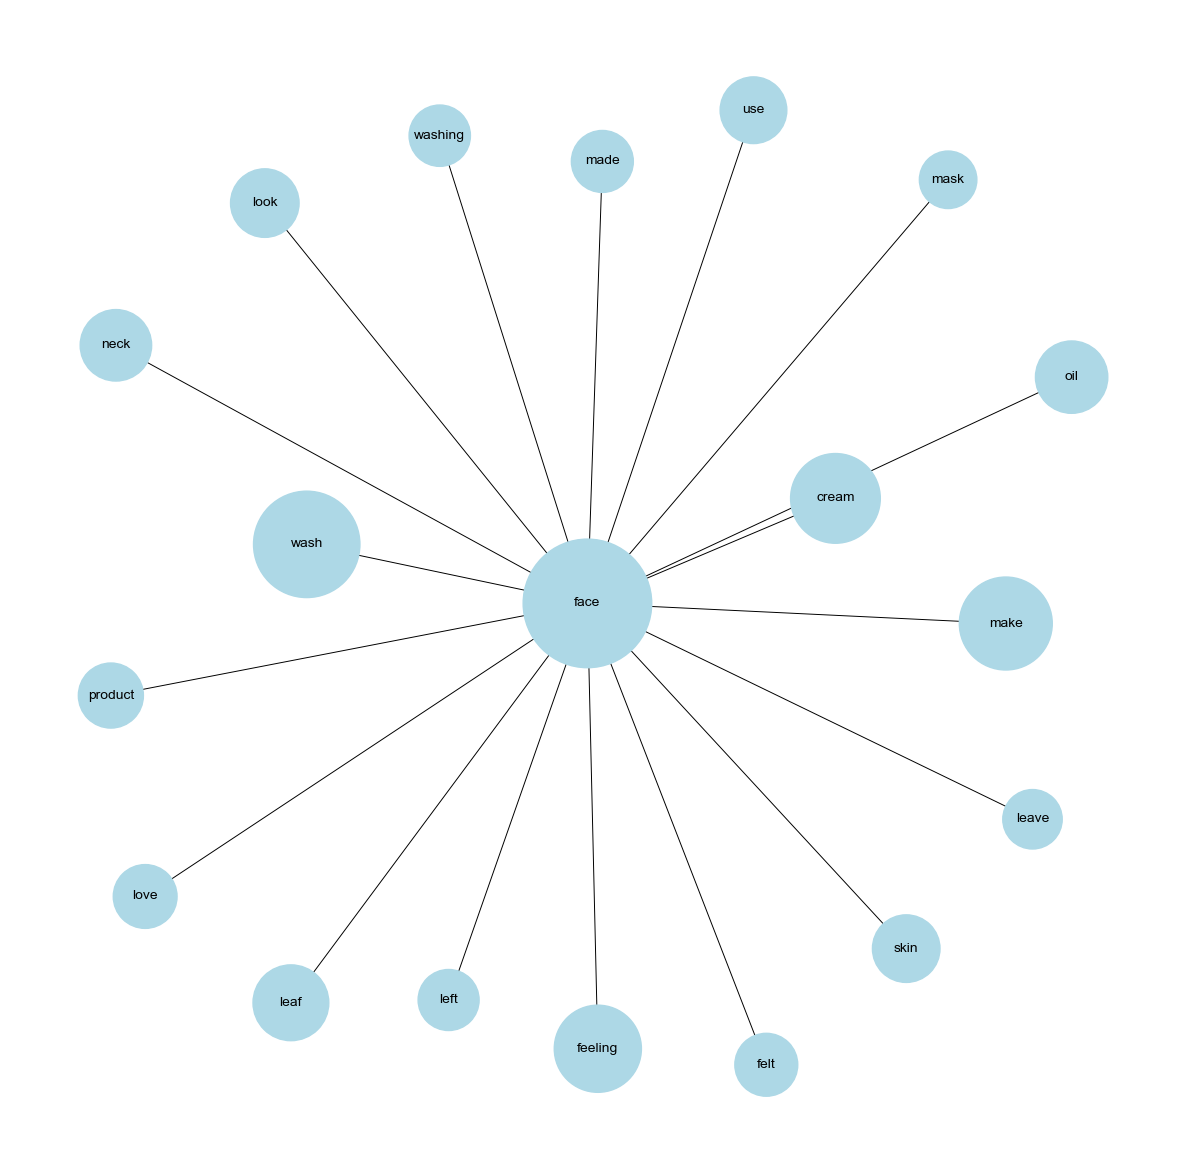

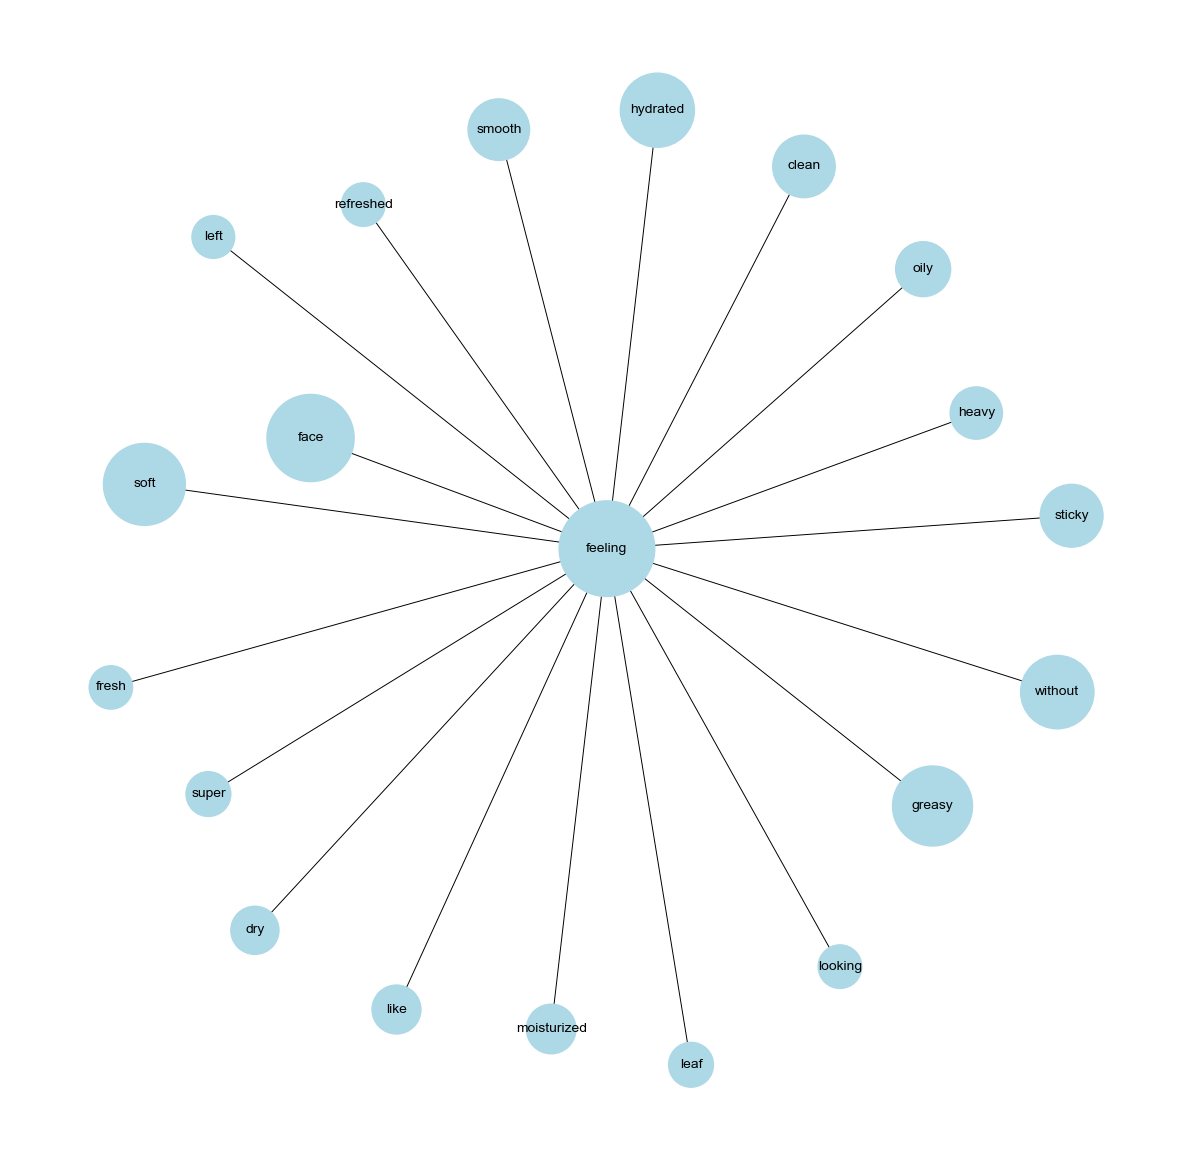

In [42]:
def draw_network(key_word: str, lst_start: int, lst_end: int, 
                 spring_k=7, nsize_1=8, nsize_2=100):
    """Returns a network graph with the keyword in the center"""

    # Create a list of bigrams for the keyword
    merged_dict = defaultdict(int)
    for bigram, count in bigrams_sorted:
        if key_word in bigram:
            if bigram[0].startswith(key_word):
                key = bigram
            else:
                key = (bigram[1], bigram[0])
            merged_dict[key] += count
    bigram_lst = sorted(merged_dict.items(), key=lambda x: x[1], reverse=True)[lst_start:lst_end]


    # Build a network graph
    G = nx.Graph()
    fig, ax = plt.subplots(figsize=(15, 15))  # Increased the figure size
    plt.axis('off')

    # Set the sizes and positions of the nodes
    node_sizes = {key_word: 800}  # Increased node size for key_word
    for edge, size in bigram_lst:
        node1, node2 = edge
        G.add_edge(node1, node2, weight=size)
        node_sizes[node1] = node_sizes[node2] = size
    pos = nx.spring_layout(G, k=spring_k)
    nsize_lst = [node_sizes[v] * nsize_1 
                 if v != key_word 
                 else node_sizes[v] * nsize_2 
                 for v in node_sizes]
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', ax=ax, node_size=nsize_lst)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, width=0.7);

# Call the function with adjusted parameters
draw_network('skin', 1, 20, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('product', 1, 19, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('cream', 1, 17, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('face', 1, 19, spring_k=15,  nsize_1=2, nsize_2=10)
draw_network('feeling', 1, 20,spring_k=15,  nsize_1=2, nsize_2=10)
plt.show()

## Trigrams
##### Now, let's look at combinations of three words (trigrams). Yes, we can continue to increase the size of the word group further, but as a rule it is optimal to stop at a group of the size of three words.

#### Let's build a visualization of the most common trigrams:

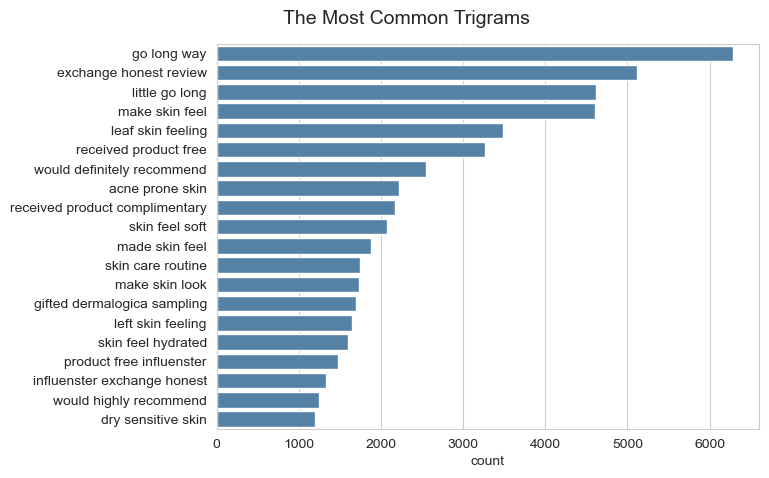

In [40]:

# Create sorted list of all trigrams
trigrams = Counter()
for phrase in latest_review['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)

# Create dataframe fromt the most common trigrams
trigrams_df = pd.DataFrame(trigrams_sorted[:20], columns=['trigram', 'count'])

# Draw a barplot 
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
sns.barplot(x='count', color='steelblue',
            y=[' '.join(trigram) for trigram in trigrams_df['trigram']], 
            data=trigrams_df)
plt.xlabel('count')
plt.title('The Most Common Trigrams', fontsize=14, y=1.03, x=0.35)
plt.show()

Here we see the most frequent mentions of time duration, mentions of skin feeling, 
an acne problem already encountered, and another interesting observation. 
Here we can see mentions of getting the product in exchange for an honest review and getting the product complimentary, etc. 
In my opinion, it is good that the text explicitly mentions such things, it allows customers to maintain trust in the products and brands.

Finally, let's look at an example of using the n-gram in a sample of interest - negative reviews. The most frequent trigrams in negative reviews:

In [41]:
trigrams = Counter()
neg_df = latest_review[latest_review['true_sentiment'] == 'negative']
for phrase in neg_df['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)
trigrams_sorted[:20]

[(('really', 'wanted', 'love'), 301),
 (('wanted', 'love', 'product'), 231),
 (('acne', 'prone', 'skin'), 220),
 (('really', 'wanted', 'like'), 216),
 (('exchange', 'honest', 'review'), 157),
 (('dont', 'waste', 'money'), 140),
 (('wanted', 'like', 'product'), 130),
 (('received', 'product', 'free'), 125),
 (('made', 'skin', 'feel'), 117),
 (('left', 'skin', 'feeling'), 110),
 (('make', 'skin', 'feel'), 109),
 (('didnt', 'notice', 'difference'), 103),
 (('excited', 'try', 'product'), 96),
 (('dry', 'sensitive', 'skin'), 92),
 (('didnt', 'see', 'difference'), 79),
 (('would', 'recommend', 'product'), 75),
 (('every', 'time', 'use'), 72),
 (('sits', 'top', 'skin'), 70),
 (('dont', 'sensitive', 'skin'), 67),
 (('high', 'hope', 'product'), 67)]

#### sentiment visualization

In [19]:
from sentiment_nb import plot_wordcloud 

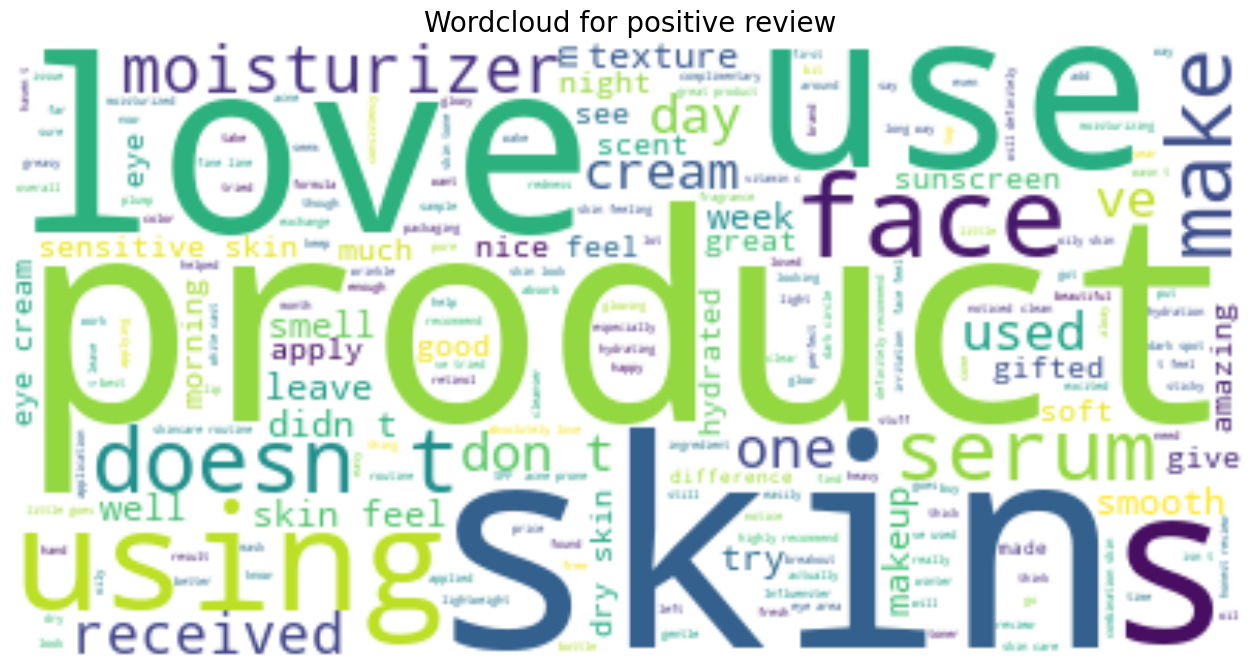

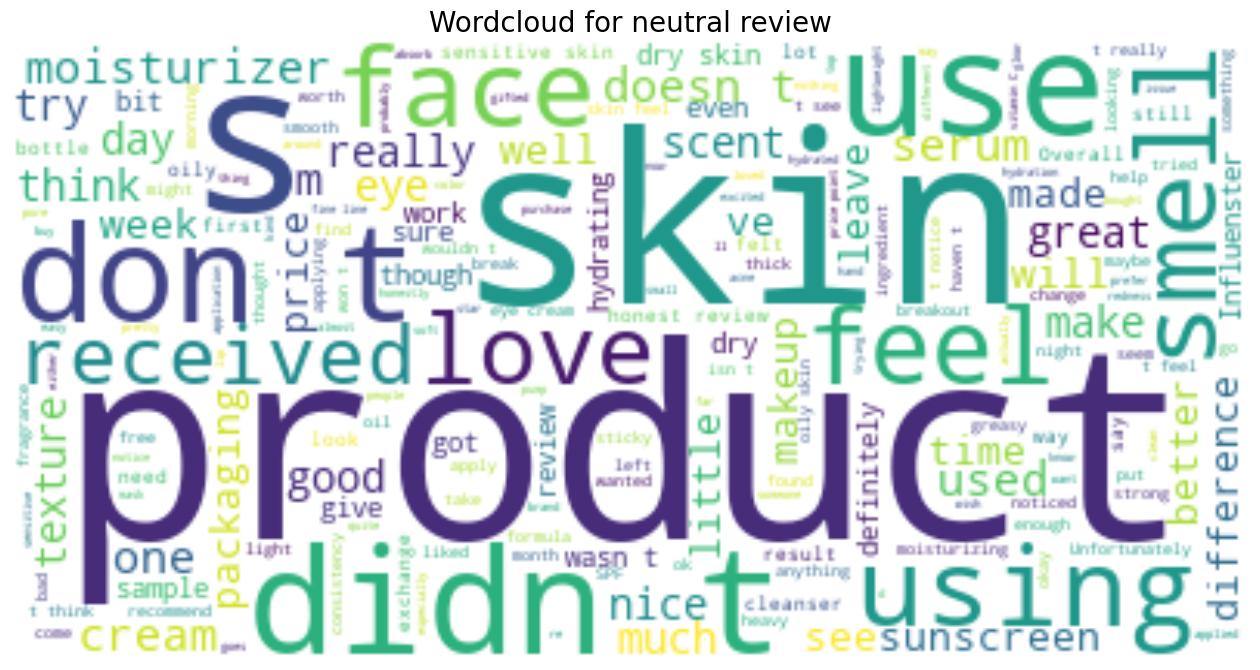

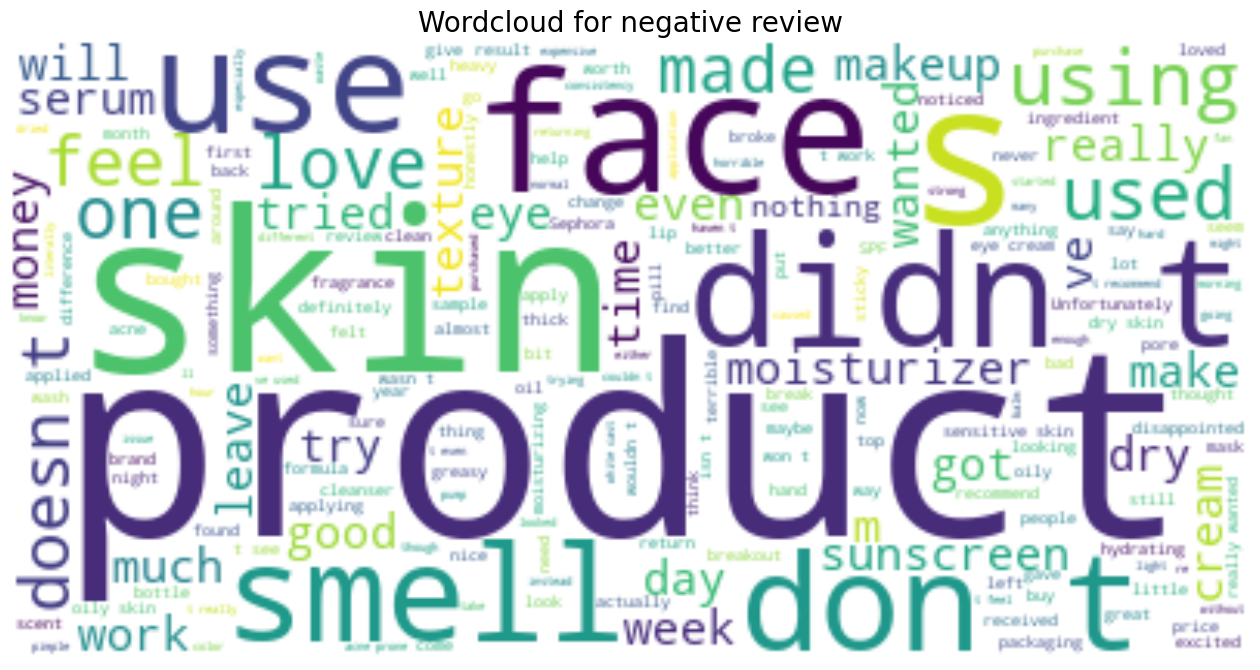

In [20]:
# extract review based on sentiment
sentiment_positive=latest_review[latest_review['true_sentiment']=='positive']
sentiment_neutral=latest_review[latest_review['true_sentiment']=='neutral']
sentiment_negative=latest_review[latest_review['true_sentiment']=='negative']

# join the text into one string 
text_positive=' '.join(sentiment_positive['review_text'])
text_neutral=' '.join(sentiment_neutral['review_text'])
text_negative=' '.join(sentiment_negative['review_text'])

# initiate the plot
positive_plot=plot_wordcloud(text_positive,'Wordcloud for positive review')
neutral_plot=plot_wordcloud(text_neutral,'Wordcloud for neutral review')
negative_plot=plot_wordcloud(text_negative,'Wordcloud for negative review')

# Show the plot
positive_plot.show()
neutral_plot.show()
negative_plot.show()


#### Naive Bay Classfier

this section to be taken out and put seperate as sentiment_train.ipynb to reduce retraining work
- only trained model will be included under this section 
- and interative testing 

if to add:
- sentiment graph, feature extractions etc 

to do:
- model improvement hyper tuning 
- bert model 
- feature importance 

In [21]:
from sentiment_nb import remove_plural_preprocessor
from sentiment_nb import train_naive_bayes_classifier 
from sentiment_nb import get_accuracy 
from sentiment_nb import get_confusion_matrix


In [22]:
data = latest_review
text_col = 'review_text'

# Train the Naive Bayes classifier and get accuracy for train and test sets, and confusion matrix
classifier, train_accuracy, test_accuracy, confusion_mat = train_naive_bayes_classifier(data, text_col)

# Print accuracy for train and test sets
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_mat)

# Get accuracy for the entire dataset (can be used for validation or unseen data)
overall_accuracy = get_accuracy(classifier, data, text_col)
print(f'Overall Accuracy: {overall_accuracy:.2f}')


/Users/ljyjiayi/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/609 Text/text_analytics/sentiment_nb.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews'] = data[text_col].apply(remove_plural_preprocessor)


Train Accuracy: 0.87
Test Accuracy: 0.86
Confusion Matrix:
[[60336  2284  1670]
 [ 2780  1860  1150]
 [ 1707   827  4277]]
Overall Accuracy: 0.87


#### validation

In [23]:
from sentiment_nb import predict_single_sentiment

In [24]:
test='I used it from almost two weeks and feel my face not looking dull anymore. Simple step to use it and make your skin looks good.'

In [25]:
# Predict sentiment for the validation text
predicted_sentiment = predict_single_sentiment(classifier, test)
print(f'Predicted Sentiment for Validation Text: {predicted_sentiment}')

Predicted Sentiment for Validation Text: positive


In [26]:
test='Did not like the product cos too harsh for my sensitive skin.'

In [27]:
# Predict sentiment for the validation text
predicted_sentiment = predict_single_sentiment(classifier, test)
print(f'Predicted Sentiment for Validation Text: {predicted_sentiment}')

Predicted Sentiment for Validation Text: positive


In [28]:
test='Not sure if I saw a difference but it didnt make my skin worse either. Affordable.'

In [29]:
# Predict sentiment for the validation text
predicted_sentiment = predict_single_sentiment(classifier, test)
print(f'Predicted Sentiment for Validation Text: {predicted_sentiment}')

Predicted Sentiment for Validation Text: negative
